In [13]:
# 패션 MNIST 데이터 가져오기
import keras
(train_input, train_target), (test_input, test_target) =\
     keras.datasets.fashion_mnist.load_data()

In [14]:
# Conv2D에의 데이터는 반드시 채널 차원이 필요
train_input = train_input.reshape(-1, 28, 28, 1)

In [15]:
# 정규화 - 0~1
train_scaled = train_input / 255.0

In [16]:
# 학습세트와 검증세트 분리
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target
)

In [17]:
# 층 구성 
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

In [18]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(100,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 342,616 (1.31 MB)

 Trainable params: 342,616 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

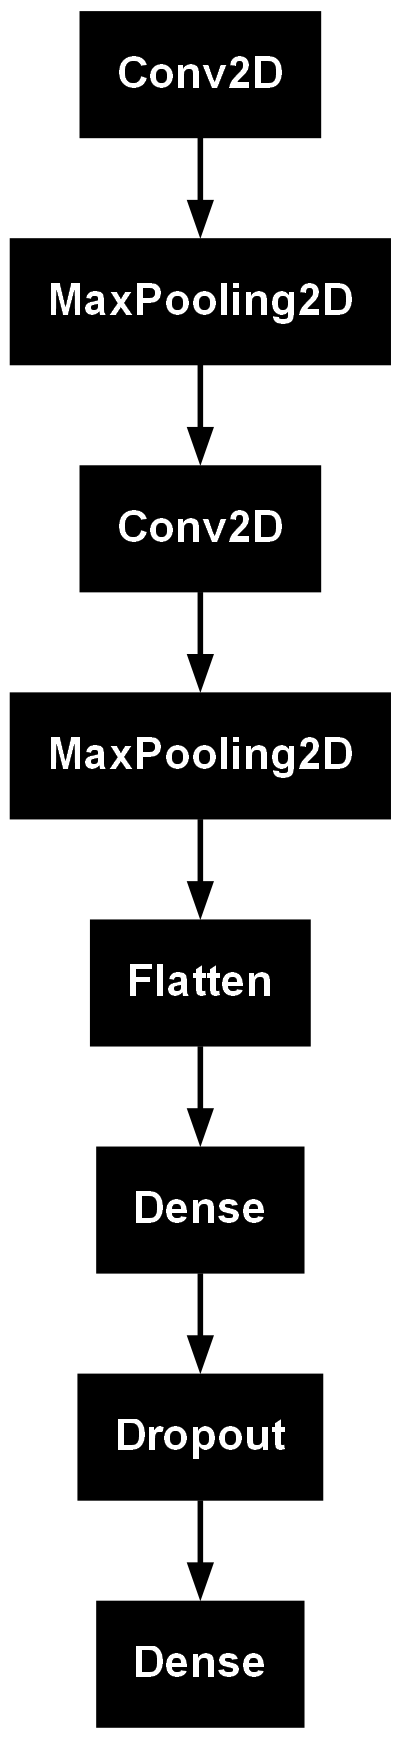

In [20]:
keras.utils.plot_model(model)

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist  = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target), callbacks=[keras.callbacks.ModelCheckpoint('best-fashion-mnist.h5', save_best_only=True), keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)])
model.save()

Epoch 1/20
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7103 - loss: 0.8879

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7105 - loss: 0.8872 - val_accuracy: 0.8777 - val_loss: 0.3403
Epoch 2/20
1403/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8746 - loss: 0.3591

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8746 - loss: 0.3591 - val_accuracy: 0.8927 - val_loss: 0.2874
Epoch 3/20
1402/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8922 - loss: 0.3030

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8922 - loss: 0.3029 - val_accuracy: 0.9056 - val_loss: 0.2546
Epoch 4/20
1404/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9056 - loss: 0.2586

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9056 - loss: 0.2586 - val_accuracy: 0.9075 - val_loss: 0.2444
Epoch 5/20
1401/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9137 - loss: 0.2363

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9137 - loss: 0.2363 - val_accuracy: 0.9123 - val_loss: 0.2324
Epoch 6/20
1401/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9208 - loss: 0.2120

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9209 - loss: 0.2121 - val_accuracy: 0.9195 - val_loss: 0.2185
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9260 - loss: 0.1961 - val_accuracy: 0.9193 - val_loss: 0.2230
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9349 - loss: 0.1723 - val_accuracy: 0.9218 - val_loss: 0.2249
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9395 - loss: 0.1597 - val_accuracy: 0.9192 - val_loss: 0.2415


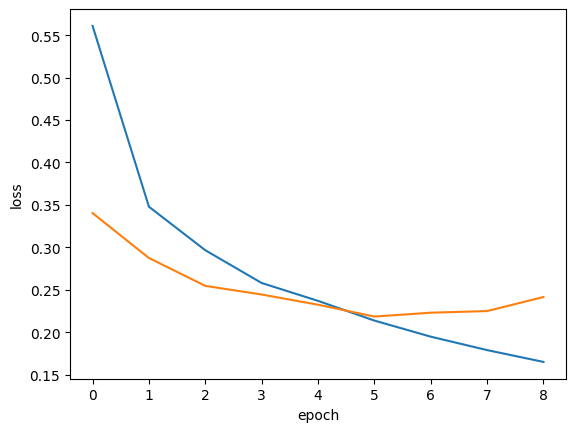

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [23]:
model.evaluate(val_scaled, val_target)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9195 - loss: 0.2222


[0.21846315264701843, 0.9194666743278503]

In [24]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9105 - loss: 0.2491


[0.24616584181785583, 0.9100000262260437]

In [25]:
import numpy as np
predictions = model.predict(test_scaled[:10])
np.round(predictions, decimals=3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.  